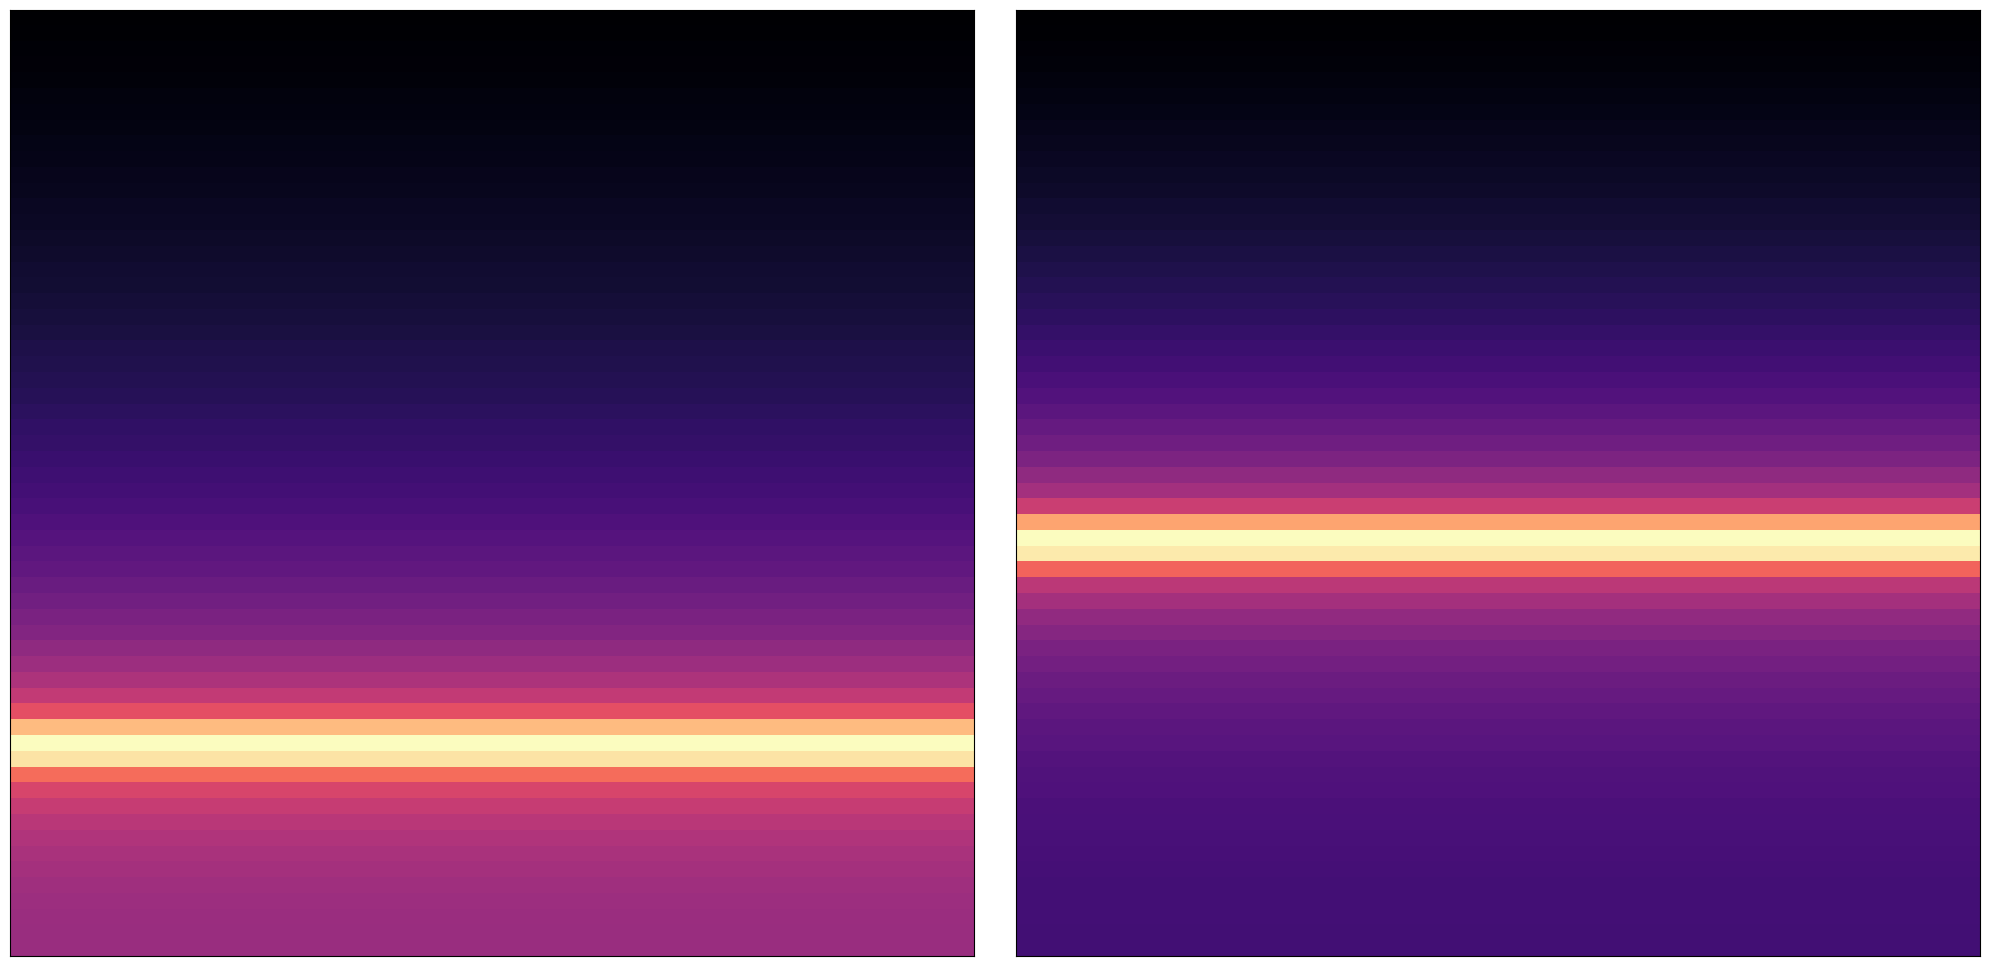

In [58]:
import sys
sys.path.append('../')
import torch
import torchaudio
from src.ddsp.mss_loss import MSSLoss
import numpy as np

sample_rate = 16000
frame_num = 4000
spec = torchaudio.transforms.Spectrogram(n_fft=256).cuda()
eps = 1e-7

gt_freq = 800
t = torch.arange(frame_num).cuda()/sample_rate
y_gt = torch.sin(2 * np.pi * gt_freq * t).unsqueeze(0)
spec_gt = spec(y_gt)
spec_gt[:, :] = spec_gt.mean(-1).unsqueeze(-1)
spec_gt = (spec_gt + eps).log2() - np.log2(eps)


pred_freq1 = 1600
y_pred1 = torch.sin(2 * np.pi * pred_freq1 * t).unsqueeze(0)
spec_pred1 = spec(y_pred1)
spec_pred1[:, :] = spec_pred1.mean(-1).unsqueeze(-1)
spec_pred1 = (spec_pred1 + eps).log2() - np.log2(eps)

pred_freq2 = 1605
y_pred2 = torch.sin(2 * np.pi * pred_freq2 * t).unsqueeze(0)
spec_pred2 = spec(y_pred2)
spec_pred2[:, :] = spec_pred2.mean(-1).unsqueeze(-1)
spec_pred2 = (spec_pred2 + eps).log2() - np.log2(eps)


x = torch.ones_like(spec_gt)
x.requires_grad = True

spec_pred = spec_pred1 + (spec_pred2 - spec_pred1) * x

loss = torch.nn.functional.l1_loss(spec_pred, spec_gt)

loss.backward()

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(spec_gt[0][:60].cpu().numpy(), origin="lower", aspect="auto", cmap='magma')
fig.tight_layout()
# remove ticks
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(spec_pred[0][:60].cpu().detach().numpy(), origin="lower", aspect="auto", cmap='magma')
fig.tight_layout()
# remove ticks
plt.xticks([])
plt.yticks([])
# plt.subplot(1, 3, 3)
# grad = x.grad[0].cpu().detach().numpy()
# grad[:25] = -grad[51:26:-1]
# print(grad)
# plt.imshow(grad[:60], origin="lower", aspect="auto", cmap='binary')
plt.show()
